In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
import datetime
import pickle
import matplotlib.dates as mdates

In [8]:
# load primary data
data = xr.load_dataset('../data/hydro_krummh.nc').to_dataframe()
data.head()

,Prec_dissagg_1,Prec_dissagg_2,Prec_dissagg_3,Prec_dissagg_4,Prec_dissagg_5,Prec_dissagg_6,Prec_dissagg_7,Prec_dissagg_8,Prec_dissagg_9,Prec_dissagg_10,...,Prec_dissagg_77,Prec_dissagg_78,Prec_dissagg_79,Prec_dissagg_80,Prec,wl_Knock_Outer,wl_LW,wl_Knock_Inner,Knock_pump_obs,Q_Knock
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1,NaN,-1325.000000,NaN,NaN,NaN
2011-01-01 01:00:00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1,NaN,-1325.000000,NaN,NaN,NaN
2011-01-01 02:00:00,0.0,0.0,0.0,0.491553,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,-1319.090942,NaN,NaN,NaN
2011-01-01 03:00:00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1,NaN,-1315.000000,NaN,NaN,NaN
2011-01-01 04:00:00,0.0,0.0,0.0,0.038447,0.0,0.240214,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1,NaN,-1310.877563,NaN,NaN,NaN


# Plots time series of selected events

In [9]:
def plot_knock(t1,t2, plot_knock_level = True):
    fig, ax = plt.subplots(nrows = 2, sharex = True, figsize = [11,7])
#    ax[0] = plt.subplot(311)  #, gridspec_kw={'height_ratios': [1, 2]}
    ax[0].plot(data['Prec'][t1:t2], label = 'Hourly\nprecipitation\n(P) at Emden', linestyle = 'dotted')
    ax[0].plot(data['Q_Knock'][t1:t2].resample('1d').sum(), label = 'Daily runoff\n(E) at Knock', marker = 'o', linestyle = 'dotted')

    ax[0].set_ylabel('P and E\n[mm]')
    # set visibility of x-axis as False
    ax[0].tick_params('x', labelbottom=False)
    ax[0].set_title("Precipitation and Drainage", fontsize=13)
    ax[0].legend(bbox_to_anchor=(1, 0.2), loc="lower left", ncol=1, fontsize = 11)

#    ax[1] = plt.subplot(313, sharex = ax[0])
    
    if plot_knock_level:
        ax[1].plot(data['wl_Knock_Outer'][t1:t2]/1000, label = "$H_A$ [m]")
        ax[1].plot((data['wl_Knock_Inner'][t1:t2]/1000), label = "$H_I$ [m]")
        ax[1].fill_between(data['Knock_pump_obs'][t1:t2].index,(data['Knock_pump_obs'][t1:t2] / 100 - 2),-2, alpha = 0.2, label = "Used pump capacity\n(-2 = 0%)\n(-1 = 100%)")
        ax[1].axhline(min(data['wl_Knock_Inner'][data['Knock_pump_obs']>0]/1000), label = "$H_{min}$ [m]", linestyle = "dotted", alpha = 0.5, color = "orange")
    ax[1].plot((data['wl_LW'])[t1:t2]/1000, label = "$H_G$ [m] (LW)")
    ax[1].axhline(-1, label = "$H_Ü$ -1m", linestyle = "dotted", alpha = 0.5, color = "red")
    ax[1].axhline(-1.4, label = "$H_{P, winter}$ -1.4m", linestyle = "dotted", alpha = 0.5)

    ax[1].set_ylabel('Water level\n[mNN]')
    ax[1].set_ylim(-2,-0.5)
    ax[1].set_title("Water levels and pumping", fontsize=13)
    ax[1].legend(bbox_to_anchor=(1, 0), loc="lower left", ncol=1, fontsize = 11)
    ax[1].set_xlim([t1, t2])

    
#    ax[2] = plt.subplot(312, sharex = ax[0])
    ax[1].set_xlabel('Date')
    ax[1].xaxis.set_major_formatter(
        mdates.ConciseDateFormatter(ax[1].xaxis.get_major_locator()))
    
    return(fig)

In [10]:
# select all days in which water level at Longewehr exceeded -1000 mm
np.unique(data.index[data.wl_LW >= -1000].date)

array([datetime.date(2011, 2, 15), datetime.date(2011, 8, 30),
       datetime.date(2011, 9, 8), datetime.date(2011, 9, 9),
       datetime.date(2011, 12, 5), datetime.date(2011, 12, 6),
       datetime.date(2011, 12, 7), datetime.date(2011, 12, 8),
       datetime.date(2011, 12, 9), datetime.date(2011, 12, 10),
       datetime.date(2011, 12, 11), datetime.date(2011, 12, 12),
       datetime.date(2012, 1, 1), datetime.date(2012, 1, 2),
       datetime.date(2012, 1, 3), datetime.date(2012, 1, 4),
       datetime.date(2012, 1, 5), datetime.date(2012, 1, 6),
       datetime.date(2013, 11, 7), datetime.date(2014, 5, 11),
       datetime.date(2014, 5, 12), datetime.date(2015, 11, 15),
       datetime.date(2015, 11, 16), datetime.date(2017, 3, 19),
       datetime.date(2017, 3, 20), datetime.date(2017, 9, 8),
       datetime.date(2017, 9, 9), datetime.date(2017, 12, 8),
       datetime.date(2017, 12, 9), datetime.date(2018, 1, 3),
       datetime.date(2018, 1, 4), datetime.date(2018, 1, 18),

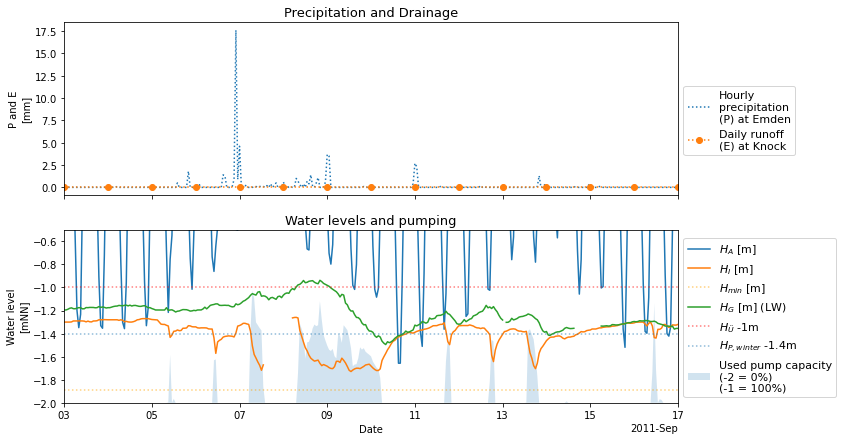

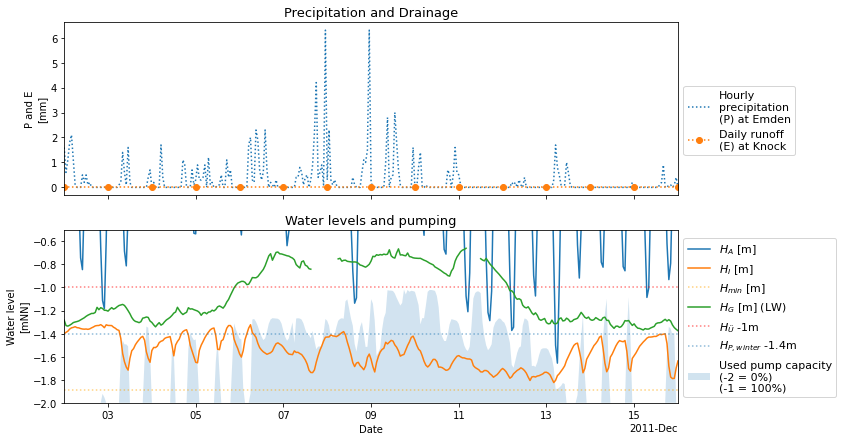

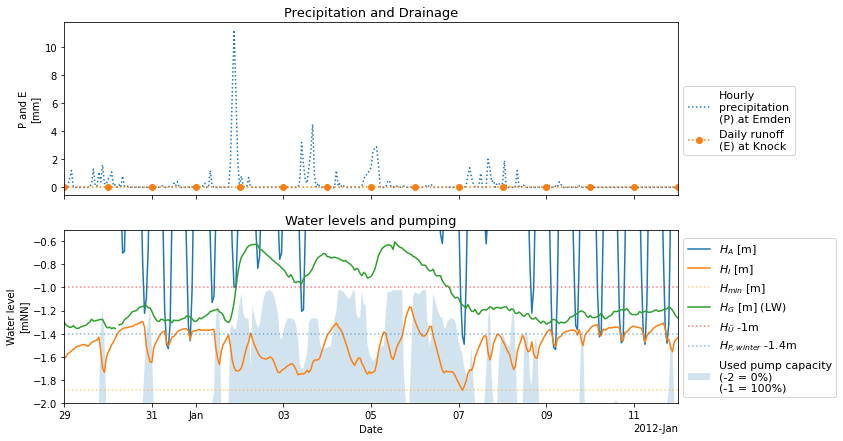

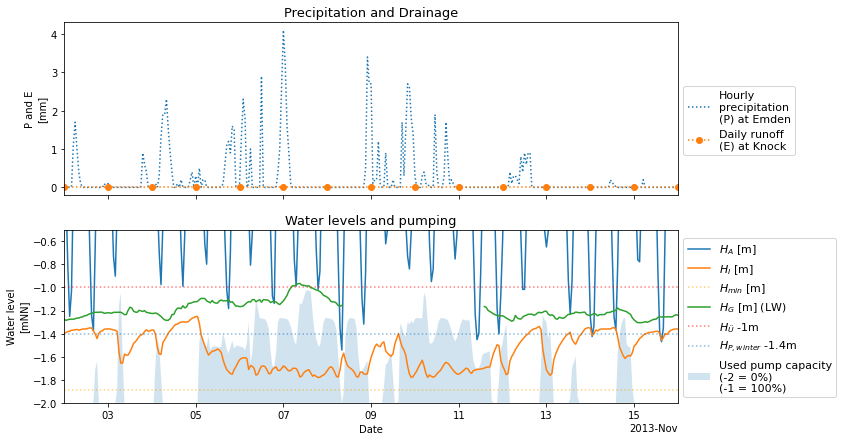

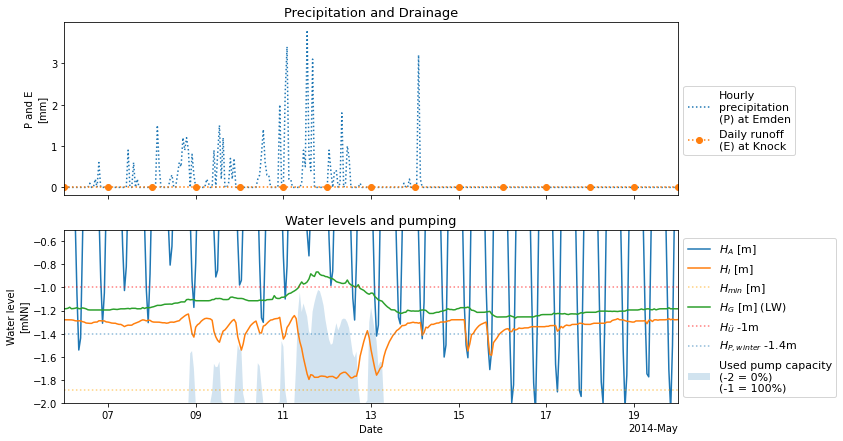

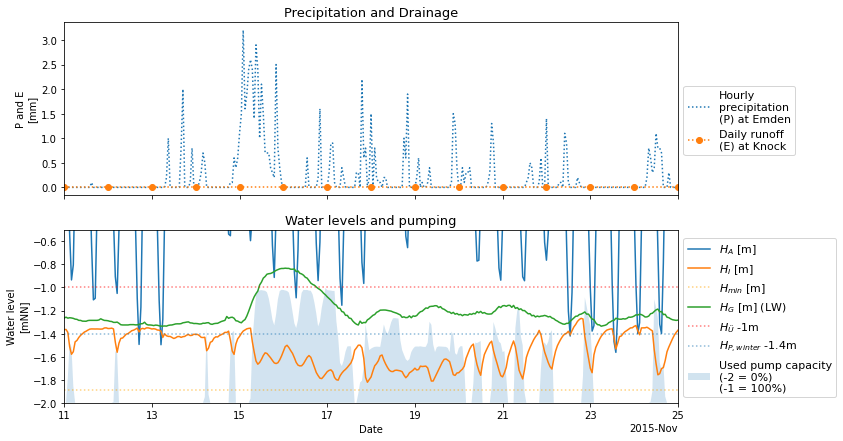

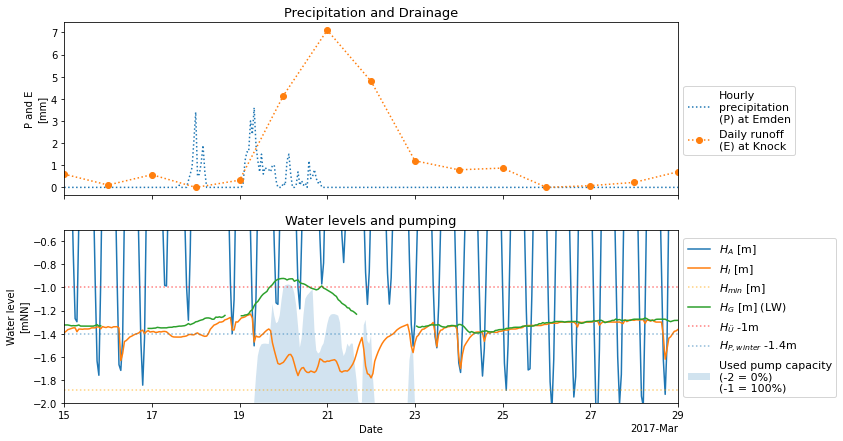

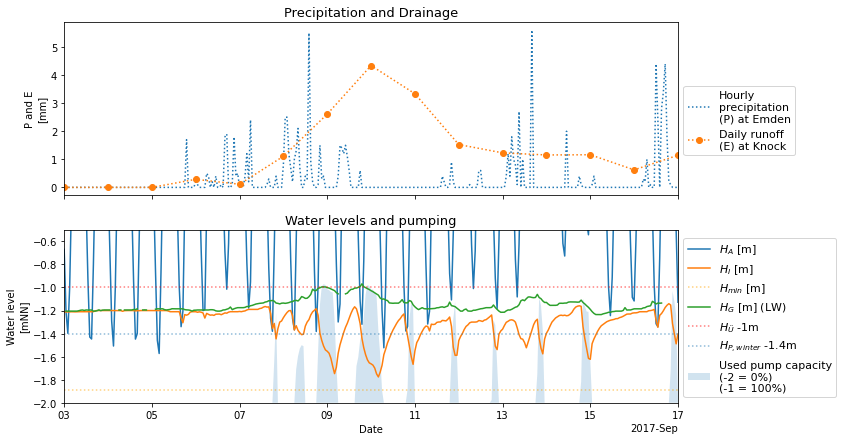

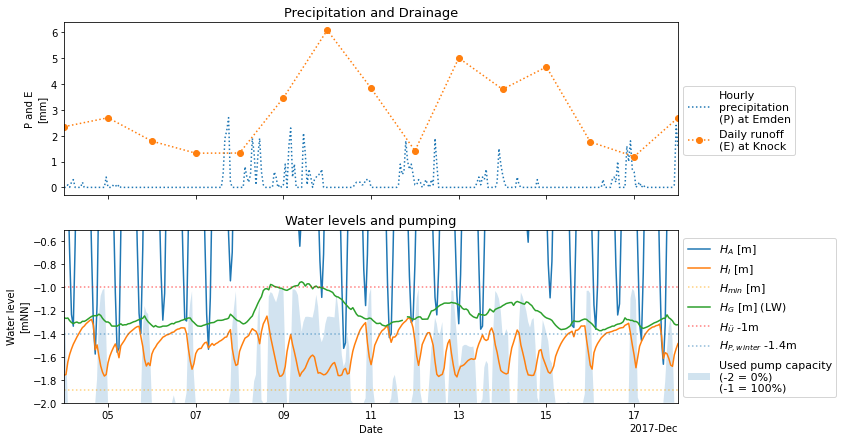

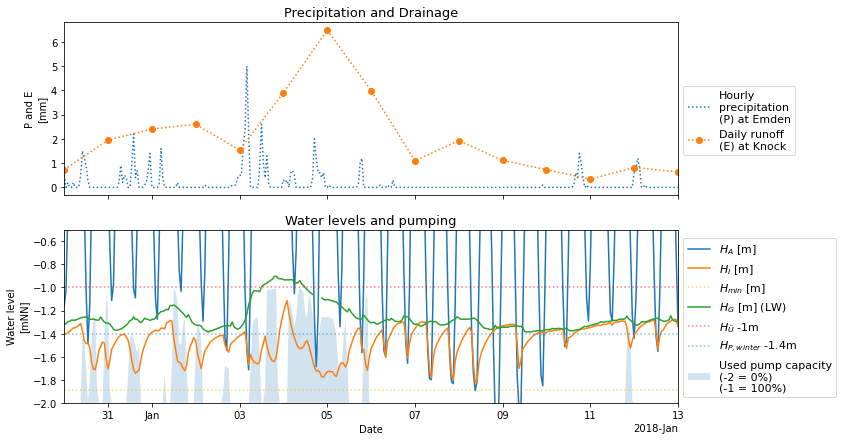

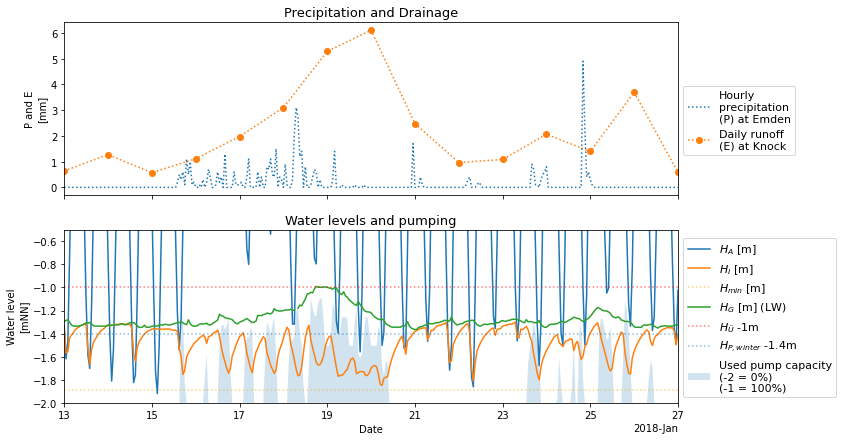

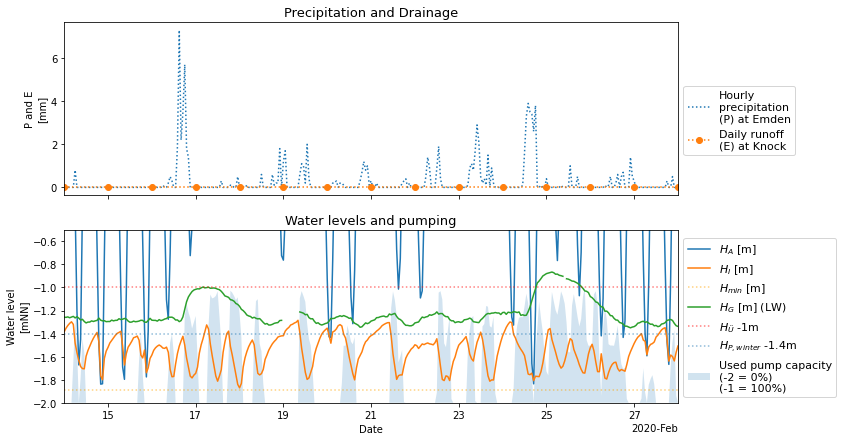

In [11]:
# manual definition of starting dates for these events and plotting, given appr. 4 days leading time before preciptation event 
events = {
#    "2011-02":datetime.date(2011, 2, 10),  # missing water level data at Knock
#    "2011-08":datetime.date(2011, 8, 25),  # missing water level data at Knock
    "2011-09":datetime.date(2011, 9, 3),
    "2011-12":datetime.date(2011, 12, 2),
    "2012-01":datetime.date(2011, 12, 29),
    "2013-11":datetime.date(2013, 11, 2),
    "2014-05":datetime.date(2014, 5, 6),
    "2015-11":datetime.date(2015, 11, 11),
#    "2017-02":datetime.date(2017, 2, 19), # did not reach critical water level, manual identification
    "2017-03":datetime.date(2017, 3, 15),
    "2017-09":datetime.date(2017, 9, 3),
    "2017-12":datetime.date(2017, 12, 4),
    "2018-01-03":datetime.date(2017, 12, 30),
    "2018-01-18":datetime.date(2018, 1, 13),
    "2020-02":datetime.date(2020, 2, 14)
}
for z in events:
    plot_knock(events[z],events[z]+datetime.timedelta(days=14)).savefig("images/event_"+z+".png")

In [12]:
with open('cache/events.pkl', 'wb') as file:
    pickle.dump(events, file)

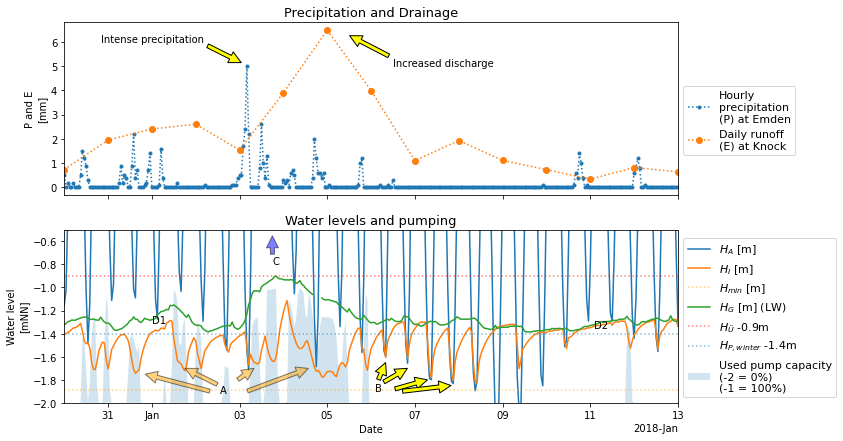

In [13]:
# create annotated figure for one event

z = "2018-01-03"
t1 = datetime.datetime.combine(events[z], datetime.time(0))
t2 = events[z]+datetime.timedelta(days=14)
plot_knock_level = True


fig, ax = plt.subplots(nrows = 2, sharex = True, figsize = [11,7])
#    ax[0] = plt.subplot(311)  #, gridspec_kw={'height_ratios': [1, 2]}
ax[0].plot(data['Prec'][t1:t2], label = 'Hourly\nprecipitation\n(P) at Emden', linestyle = 'dotted', marker = '.')
ax[0].plot(data['Q_Knock'][t1:t2].resample('1d').sum(), label = 'Daily runoff\n(E) at Knock', marker = 'o', linestyle = 'dotted')

ax[0].set_ylabel('P and E\n[mm]')
# set visibility of x-axis as False
ax[0].tick_params('x', labelbottom=False)
ax[0].set_title("Precipitation and Drainage", fontsize=13)
ax[0].legend(bbox_to_anchor=(1, 0.2), loc="lower left", ncol=1, fontsize = 11)

#    ax[1] = plt.subplot(313, sharex = ax[0])

if plot_knock_level:
    ax[1].plot(data['wl_Knock_Outer'][t1:t2]/1000, label = "$H_A$ [m]")
    ax[1].plot((data['wl_Knock_Inner'][t1:t2]/1000), label = "$H_I$ [m]")
    ax[1].fill_between(data['Knock_pump_obs'][t1:t2].index,(data['Knock_pump_obs'][t1:t2] / 100 - 2),-2, alpha = 0.2, label = "Used pump capacity\n(-2 = 0%)\n(-1 = 100%)")
    ax[1].axhline(min(data['wl_Knock_Inner'][data['Knock_pump_obs']>0]/1000), label = "$H_{min}$ [m]", linestyle = "dotted", alpha = 0.5, color = "orange")
ax[1].plot((data['wl_LW'])[t1:t2]/1000, label = "$H_G$ [m] (LW)")
ax[1].axhline(-0.9, label = "$H_Ü$ -0.9m", linestyle = "dotted", alpha = 0.5, color = "red")
ax[1].axhline(-1.4, label = "$H_{P, winter}$ -1.4m", linestyle = "dotted", alpha = 0.5)

ax[1].set_ylabel('Water level\n[mNN]')
ax[1].set_ylim(-2,-0.5)
ax[1].set_title("Water levels and pumping", fontsize=13)
ax[1].legend(bbox_to_anchor=(1, 0), loc="lower left", ncol=1, fontsize = 11)
ax[1].set_xlim([t1, t2])

ax[0].annotate('Intense precipitation', xy=(t1+datetime.timedelta(hours = 98), 5.1),
                xytext=(t1+datetime.timedelta(hours = 20), 6),arrowprops=dict(facecolor='yellow',
                                shrink=0.05),xycoords="data",)

ax[0].annotate('Increased discharge', xy=(t1+datetime.timedelta(hours = 155), 6.3),
                xytext=(t1+datetime.timedelta(hours = 180), 5.0),arrowprops=dict(facecolor='yellow',
                                shrink=0.05),xycoords="data",)

ax[1].annotate('', xy=(t1+datetime.timedelta(hours = 176), -1.65),
                xytext=(t1+datetime.timedelta(hours = 172), -1.8),arrowprops=dict(facecolor='yellow',
                                shrink=0.01),xycoords="data",)
ax[1].annotate('B', xy=(t1+datetime.timedelta(hours = 188), -1.7),
                xytext=(t1+datetime.timedelta(hours = 170), -1.9),arrowprops=dict(facecolor='yellow',
                                shrink=0.01),xycoords="data",)
ax[1].annotate('', xy=(t1+datetime.timedelta(hours = 199), -1.80),
                xytext=(t1+datetime.timedelta(hours = 181), -1.88),arrowprops=dict(facecolor='yellow',
                                shrink=0.01),xycoords="data",)
ax[1].annotate('', xy=(t1+datetime.timedelta(hours = 212), -1.85),
                xytext=(t1+datetime.timedelta(hours = 185), -1.9),arrowprops=dict(facecolor='yellow',
                                shrink=0.01),xycoords="data",)

ax[1].annotate('A', xy=(t1+datetime.timedelta(hours = 66), -1.7),
                xytext=(t1+datetime.timedelta(hours = 85), -1.92),arrowprops=dict(facecolor='orange',
                                shrink=0.01,alpha = 0.5),xycoords="data",)
ax[1].annotate('', xy=(t1+datetime.timedelta(hours = 44), -1.75),
                xytext=(t1+datetime.timedelta(hours = 80), -1.9),arrowprops=dict(facecolor='orange',
                                shrink=0.01,alpha = 0.5),xycoords="data",)
ax[1].annotate('', xy=(t1+datetime.timedelta(hours = 104), -1.7),
                xytext=(t1+datetime.timedelta(hours = 95), -1.8),arrowprops=dict(facecolor='orange',
                                shrink=0.01,alpha = 0.5),xycoords="data",)
ax[1].annotate('', xy=(t1+datetime.timedelta(hours = 134), -1.7),
                xytext=(t1+datetime.timedelta(hours = 100), -1.9),arrowprops=dict(facecolor='orange',
                                shrink=0.01,alpha = 0.5),xycoords="data",)

ax[1].annotate('C', xy=(t1+datetime.timedelta(hours = 114), -0.55),
                xytext=(t1+datetime.timedelta(hours = 114), -0.8),arrowprops=dict(facecolor='blue',
                                shrink=0.01,alpha = 0.5),xycoords="data",)

ax[1].annotate('D1', xy = (t1+datetime.timedelta(hours = 54), -1.35),xytext=(t1+datetime.timedelta(hours = 48), -1.31) ,xycoords="data")
ax[1].annotate('D2', xy = (t1+datetime.timedelta(hours = 290), -1.35),xytext=(t1+datetime.timedelta(hours = 290), -1.35) ,xycoords="data")

#    ax[2] = plt.subplot(312, sharex = ax[0])
ax[1].set_xlabel('Date')
ax[1].xaxis.set_major_formatter(
        mdates.ConciseDateFormatter(ax[1].xaxis.get_major_locator()))
